In [1]:
import csv, operator

import networkx as nx
import networkx.algorithms.community as nxcom

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Korean font
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=20)
matplotlib.rc('font', family=fontprop.get_name(), size=12)

# Plot settings
plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['axes.grid'] = False

In [2]:
# centrality 관련 함수들
def sort_node_by_centrality(centrality):
    cent_items = [(b,a) for (a,b) in centrality.items()]
    cent_items.sort()
    cent_items.reverse()
    return cent_items

def plot_centrality(title, centrality, g, top):
    pos = nx.spring_layout(g) # 겹치지 않게 레이아웃

    labels = {}
    color_map = []
    size_map = []
    for (node, value) in centrality.items():
        labels[node] = str(round(value,2))
        if node == top[0]:
            color_map.append('red')
            labels[node] += ("\n" + node)
            size_map.append(2000)
        elif node in top:
            color_map.append('orange')
            labels[node] += ("\n" + node)
            size_map.append(1200)
        else:
            color_map.append('lightgrey')
            #labels[node] += ("\n" + node)
            size_map.append(500)
            
    nx.draw_networkx_nodes(g, pos, node_color=color_map, node_size=size_map, alpha=0.7) # 노드를 그려라 (g, pos는 필수고 나머진 옵션)
    nx.draw_networkx_edges(g, pos, width=1.0, alpha=0.1) # 엣지를 그려라
    nx.draw_networkx_labels(g, pos, labels, font_size=10) # 글자를 써라
    plt.title(title)
    plt.show()

In [3]:
# Community Detection 관련 함수들
def set_node_community(G, communities):
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1
            
def set_edge_community(G):
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0
            
def get_color(i, r_off=1, g_off=1, b_off=1):
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

def plot_community(title, G, communities):
    # TOP nameset
    nameset = ['Gavroche', 'Valjean', 'Enjolras', 'Marius', 'Bossuet', 'Myriel', 'Fantine', 'Javert', 'Thenardier']
    
    labels = {}
    color_map = []
    size_map = []
    
    for node in G.nodes:
        if node in nameset:
            labels[node] = node
            size_map.append(2000)
        else:
            labels[node] = ""
            size_map.append(500)

    node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]

    external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
    internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
    internal_color = ['grey' for e in internal]

    g_pos = nx.spring_layout(G)
    plt.title(title)
    
    # external edges
    nx.draw_networkx(G, pos=g_pos, with_labels=False, node_size=0, edgelist=external, edge_color="lightgrey", alpha=0.5)
    # internal edges
    nx.draw_networkx(G, pos=g_pos, labels=labels, node_size=size_map, node_color=node_color, edgelist=internal, edge_color=internal_color, alpha=0.8)
    plt.show()

In [4]:
# 장발장 데이터 읽어오기
def loadLesmis():
    g = nx.Graph()
    reader = csv.reader(open('data/lesmis.csv', 'r'), delimiter=',')
    data = [row for row in reader]

    nodes = set([row[0] for row in data])
    edges = [(row[0], row[2]) for row in data]

    g.add_nodes_from(nodes)
    g.add_edges_from(edges)
    return g

In [5]:
# Centrality 계산
g = loadLesmis()

# Betweenness centrality
d_centrality = nx.degree_centrality(g)
d_cent_items = sort_node_by_centrality(d_centrality)

# Betweenness centrality
b_centrality = nx.betweenness_centrality(g)
b_cent_items = sort_node_by_centrality(b_centrality)

# Closeness centrality
c_centrality = nx.closeness_centrality(g)
c_cent_items = sort_node_by_centrality(c_centrality)

# Eigenvector centrality
e_centrality = nx.eigenvector_centrality(g)
e_cent_items = sort_node_by_centrality(e_centrality)

# TOP 5 계산
d_top5 = []
b_top5 = []
c_top5 = []
e_top5 = []

for v in d_cent_items[:5]:
    d_top5.append(v[1])
for v in b_cent_items[:5]:
    b_top5.append(v[1])
for v in c_cent_items[:5]:
    c_top5.append(v[1])
for v in e_cent_items[:5]:
    e_top5.append(v[1])

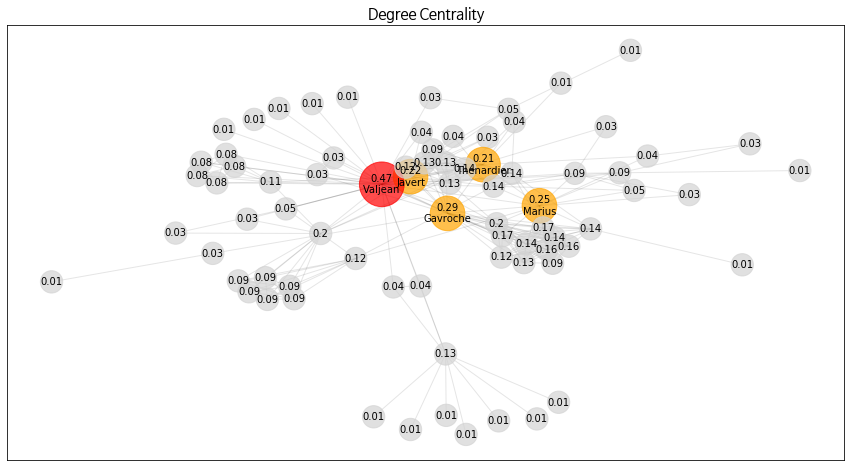

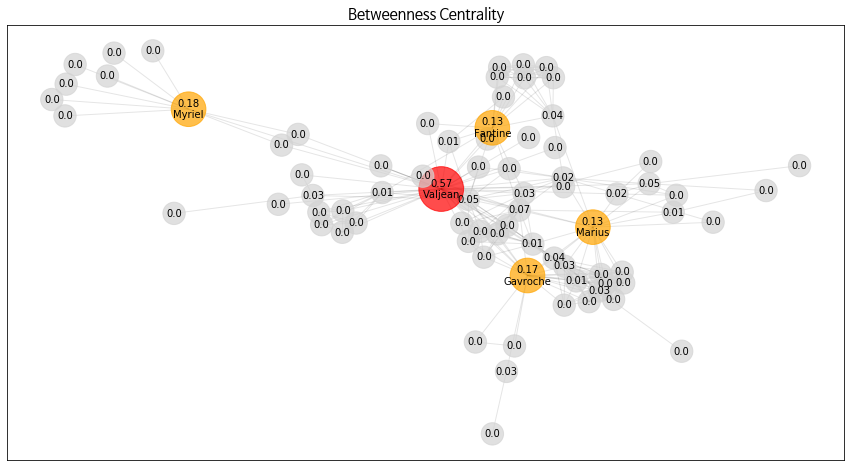

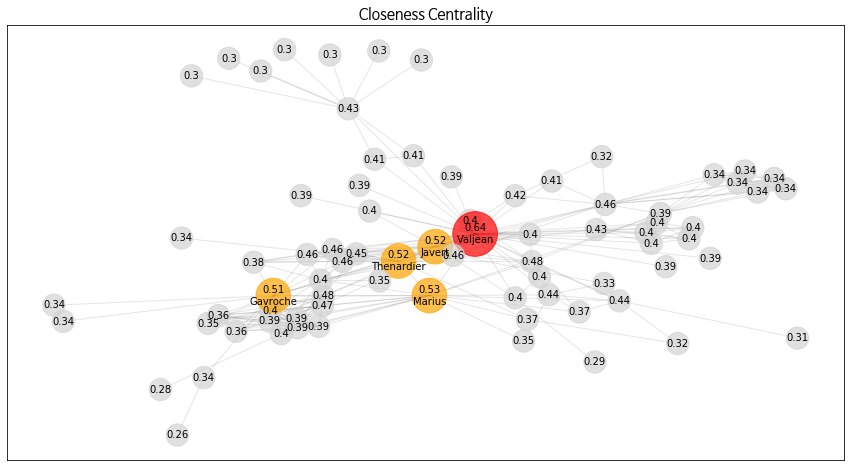

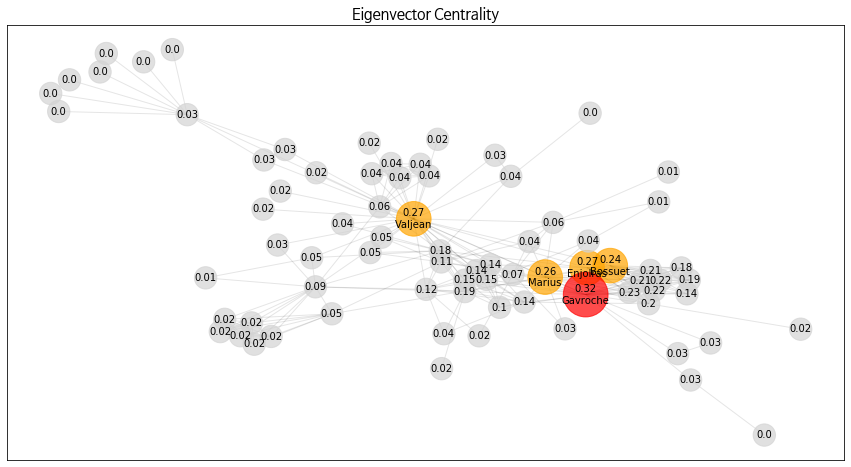

In [6]:
# Centrality Plot
plot_centrality("Degree Centrality", d_centrality, g, d_top5)
plot_centrality("Betweenness Centrality", b_centrality, g, b_top5)
plot_centrality("Closeness Centrality", c_centrality, g, c_top5)
plot_centrality("Eigenvector Centrality", e_centrality, g, e_top5)

5  communities using Q values
ID =  0 , # Nodes  =  26
frozenset({'Isabeau', 'Champtercier', 'Valjean', 'Labarre', 'Napoleon', 'Champmathieu', 'Gervais', 'Brevet', 'Scaufflaire', 'Chenildieu', 'Fauchelevent', 'Count', 'CountessDeLo', 'MotherInnocent', 'OldMan', 'Cochepaille', 'Cravatte', 'Gribier', 'MlleBaptistine', 'Judge', 'Marguerite', 'Woman1', 'MmeDeR', 'Geborand', 'MmeMagloire', 'Myriel'})
ID =  1 , # Nodes  =  17
frozenset({'MotherPlutarch', 'Grantaire', 'Courfeyrac', 'Bossuet', 'Combeferre', 'MmeBurgon', 'Child1', 'Bahorel', 'Jondrette', 'Feuilly', 'Mabeuf', 'Child2', 'MmeHucheloup', 'Prouvaire', 'Gavroche', 'Enjolras', 'Joly'})
ID =  2 , # Nodes  =  15
frozenset({'Eponine', 'Javert', 'Perpetue', 'Claquesous', 'Babet', 'Gueulemer', 'Thenardier', 'Bamatabois', 'Fantine', 'MmeThenardier', 'Brujon', 'Boulatruelle', 'Simplice', 'Montparnasse', 'Anzelma'})
ID =  3 , # Nodes  =  13
frozenset({'LtGillenormand', 'Magnon', 'Gillenormand', 'Tholomyes', 'Woman2', 'MmePontmercy', 'MlleGill

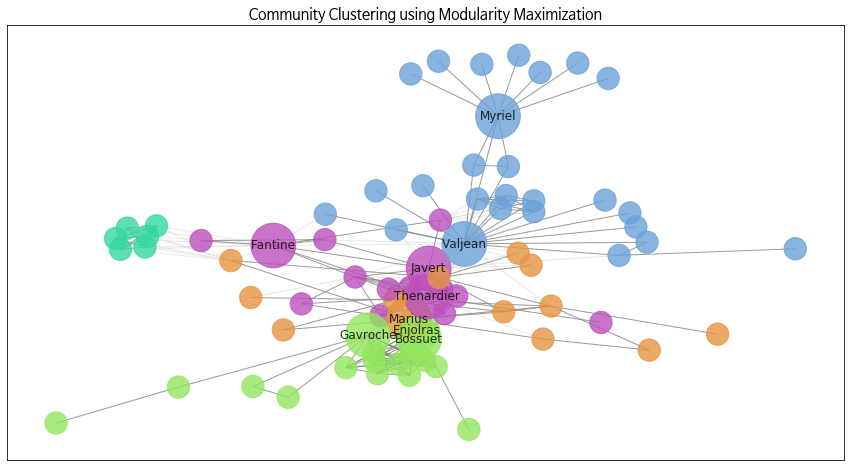

In [7]:
# Community Detection - greedy_modularity_communities
g = loadLesmis()
q_communities = sorted(nxcom.greedy_modularity_communities(g), key=len, reverse=True)
set_node_community(g, q_communities) # g.nodes['~~']['community'] 값을 커뮤니티 id 로 설정
set_edge_community(g) # g.edges[v, w]['community'] 값을 커뮤니티 id 또는 0 (같은 커뮤니티 아닐경우.=external edge) 으로 설정
    
# Count the communities
print(len(q_communities), " communities using Q values")
for community_id, nodeset in enumerate(q_communities):
    print("ID = ", community_id, ", # Nodes  = ", len(nodeset))
    print(nodeset)
    print("=================================================")

# Community Detection Plot - greedy_modularity_communities
plot_community("Community Clustering using Modularity Maximization", g, q_communities)

K =  3
Community  0 , number :  57
{'Eponine', 'Magnon', 'Isabeau', 'Child1', 'Jondrette', 'Valjean', 'Toussaint', 'MlleVaubois', 'Brujon', 'Gavroche', 'Labarre', 'Bahorel', 'Gueulemer', 'Gillenormand', 'Champmathieu', 'Gervais', 'Babet', 'Bossuet', 'MlleGillenormand', 'Feuilly', 'Mabeuf', 'Child2', 'MmeHucheloup', 'Enjolras', 'Brevet', 'Marius', 'Anzelma', 'Joly', 'Scaufflaire', 'Chenildieu', 'LtGillenormand', 'Fauchelevent', 'Woman2', 'Thenardier', 'MotherInnocent', 'MmeThenardier', 'Prouvaire', 'Boulatruelle', 'Montparnasse', 'BaronessT', 'Cochepaille', 'Cosette', 'MotherPlutarch', 'Javert', 'Claquesous', 'Simplice', 'Grantaire', 'Courfeyrac', 'Gribier', 'Combeferre', 'Pontmercy', 'MmePontmercy', 'MmeBurgon', 'Judge', 'Bamatabois', 'Woman1', 'MmeDeR'}
Community  1 , number :  10
{'Perpetue', 'Blacheville', 'Tholomyes', 'Favourite', 'Dahlia', 'Fantine', 'Marguerite', 'Listolier', 'Fameuil', 'Zephine'}
Community  2 , number :  10
{'Cravatte', 'Champtercier', 'MlleBaptistine', 'Count',

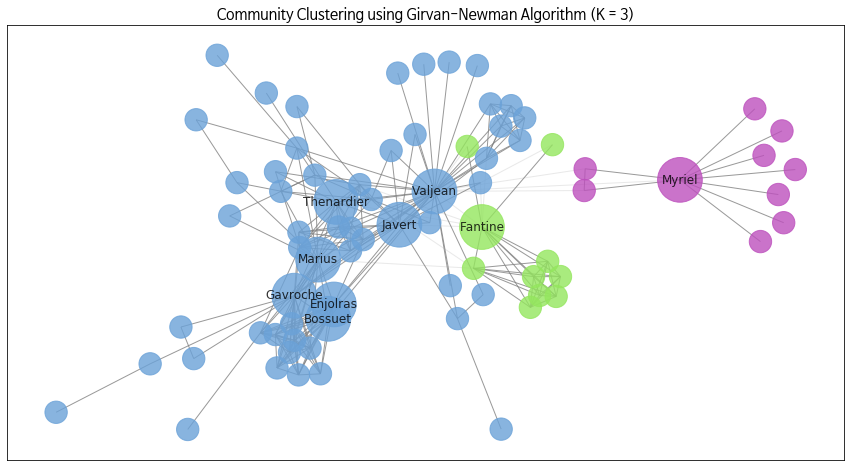

K =  4
Community  0 , number :  55
{'Eponine', 'Magnon', 'Isabeau', 'Child1', 'Valjean', 'Toussaint', 'MlleVaubois', 'Brujon', 'Gavroche', 'Labarre', 'Bahorel', 'Gueulemer', 'Gillenormand', 'Champmathieu', 'Gervais', 'Babet', 'Bossuet', 'MlleGillenormand', 'Feuilly', 'Mabeuf', 'Child2', 'MmeHucheloup', 'Enjolras', 'Brevet', 'Marius', 'Anzelma', 'Joly', 'Scaufflaire', 'Chenildieu', 'LtGillenormand', 'Fauchelevent', 'Woman2', 'Thenardier', 'MotherInnocent', 'MmeThenardier', 'Prouvaire', 'Boulatruelle', 'Montparnasse', 'BaronessT', 'Cochepaille', 'Cosette', 'MotherPlutarch', 'Javert', 'Claquesous', 'Simplice', 'Grantaire', 'Courfeyrac', 'Gribier', 'Combeferre', 'Pontmercy', 'MmePontmercy', 'Judge', 'Bamatabois', 'Woman1', 'MmeDeR'}
Community  1 , number :  10
{'Perpetue', 'Blacheville', 'Tholomyes', 'Favourite', 'Dahlia', 'Fantine', 'Marguerite', 'Listolier', 'Fameuil', 'Zephine'}
Community  2 , number :  10
{'Cravatte', 'Champtercier', 'MlleBaptistine', 'Count', 'CountessDeLo', 'Napoleon

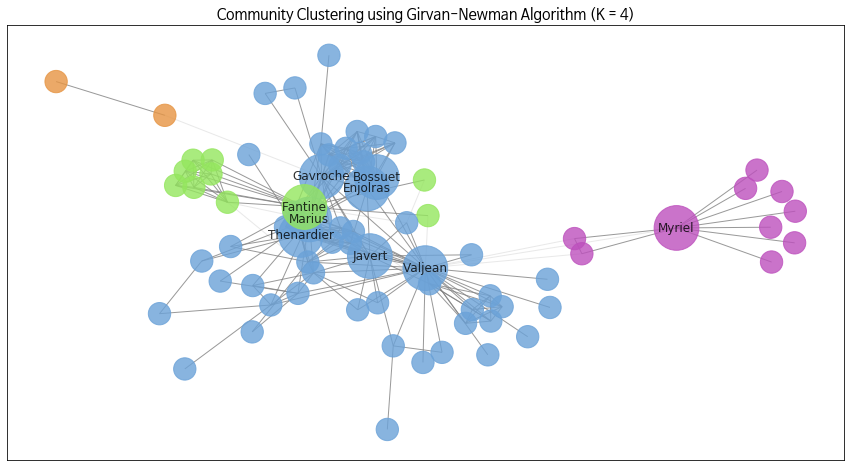

K =  5
Community  0 , number :  38
{'Eponine', 'Magnon', 'Child1', 'Toussaint', 'MlleVaubois', 'Brujon', 'Gavroche', 'Bahorel', 'Gueulemer', 'Gillenormand', 'Babet', 'Bossuet', 'MlleGillenormand', 'Feuilly', 'Mabeuf', 'Child2', 'MmeHucheloup', 'Enjolras', 'Marius', 'Anzelma', 'Joly', 'LtGillenormand', 'Woman2', 'Thenardier', 'MmeThenardier', 'Prouvaire', 'Boulatruelle', 'Montparnasse', 'BaronessT', 'Cosette', 'MotherPlutarch', 'Javert', 'Claquesous', 'Grantaire', 'Courfeyrac', 'Combeferre', 'Pontmercy', 'MmePontmercy'}
Community  1 , number :  17
{'Fauchelevent', 'Scaufflaire', 'Champmathieu', 'Isabeau', 'Gribier', 'Gervais', 'Judge', 'Bamatabois', 'Valjean', 'MotherInnocent', 'Woman1', 'Labarre', 'Simplice', 'MmeDeR', 'Cochepaille', 'Brevet', 'Chenildieu'}
Community  2 , number :  10
{'Perpetue', 'Blacheville', 'Tholomyes', 'Favourite', 'Dahlia', 'Fantine', 'Marguerite', 'Listolier', 'Fameuil', 'Zephine'}
Community  3 , number :  10
{'Cravatte', 'Champtercier', 'MlleBaptistine', 'Coun

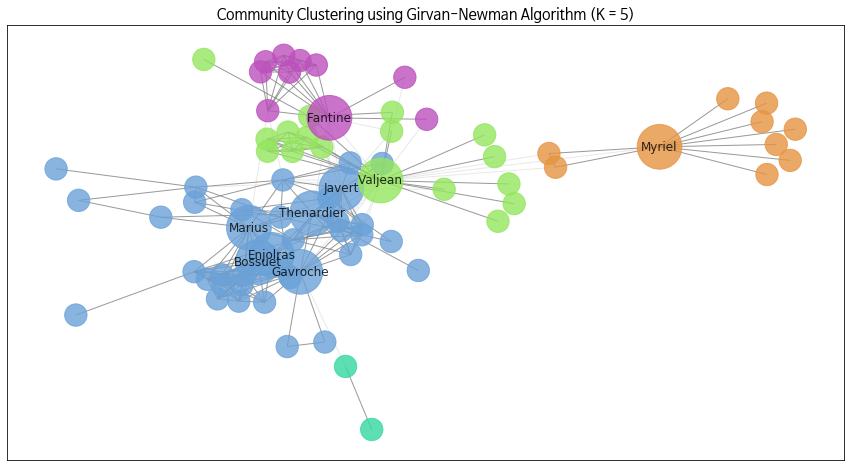

In [8]:
# Using newman
g = loadLesmis()
result = nxcom.girvan_newman(g)

for K in range(3, 6):
    for groups in result:
        if len(groups) == K:
            g_communities = groups
            break
    
    print("K = ", K)
    for i, members in enumerate(g_communities):
        print("Community ", i, ", number : ", len(members))
        print(members)
        print("================================")

    set_node_community(g, g_communities) # g.nodes['~~']['community'] 값을 커뮤니티 id 로 설정
    set_edge_community(g) # g.edges[v, w]['community'] 값을 커뮤니티 id 또는 0 (같은 커뮤니티 아닐경우.=external edge) 으로 설정
    plot_community("Community Clustering using Girvan-Newman Algorithm (K = " + str(K) + ")", g, g_communities)